### Regresion logistica
a diferencia de la lineal, la variable de salida es categorica, bien 1 o 0 bien categorias (ej hombre mujer); hay una relacion lineal pero con ciertas transformaciones, donde el dato a tener en cuenta es la probabilidad de que un dato este por encima de un umbral, normalmente 0.5 (ver grafico relacion logistica en forma de S de 0 a 1 , con centro en 0.5)

### Las matematicas detras del modelo
es un modelo de probalidad; que P de que un hombre/mujer compre un producto?
### Las tablas de contigencia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/gender-purchase/Gender%20Purchase.csv"
df = pd.read_csv(url)
df.head(5)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [3]:
# creamos una tabla de contigencia
contigency_table = pd.crosstab(df["Gender"],df["Purchase"])
contigency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [5]:
# podemos hacer la suma, con axis 1 o con axis 0
display(contigency_table.sum(axis=1),contigency_table.sum(axis=0))

Gender
Female    265
Male      246
dtype: int64

Purchase
No     231
Yes    280
dtype: int64

In [6]:
# tambien la proporcion de hombres y mujeres que compran o no (convertimos primero a float sino la division de enteros nos da 1 o 0);
# cada una de las filas se divide por el total
contigency_table.astype("float").div(contigency_table.sum(axis=1),axis=0)


Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


In [7]:
from IPython.display import Math,Latex,display

### Probabilidad condicional
* Cual es la P de que un cliente compre un producto sabiendo que es un hombre?
* Cual es la P de que sabiendo que un cliente compre un producto sea una mujer?

In [16]:
display(Math(r"P(Purchase|Male) = \frac{Numero\ total\ compras\ hechas\ por\ hombre}{Numero\ total\ hombres\ del\ grupo}"))
121/246

&lt;IPython.core.display.Math object&gt;

0.491869918699187

In [18]:
# lo contrario seria cual es la P de que no compre un producto sabiendo que es hombre
display(Math(r"P(No\ Purchase|Male) = 1-P(Purchase|Male)"))
125/246

&lt;IPython.core.display.Math object&gt;

0.508130081300813

In [17]:
# la condicion que conocemos (que haya hecho la compra) va debajo
display(Math(r"P(Female|Purchase) = \frac{Numero\ total\ compras\ hechas\ por\ mujeres}{Numero\ total\ compras} = \frac{Female\cap Purchase}{Purchase}"))
159/280

&lt;IPython.core.display.Math object&gt;

0.5678571428571428

### Ratio de probabilidades
el cociente entre los casos de exito sobre los de fracaso en nuestro suceso y para cada grupo

In [22]:
display(Math(r"P_m = \ Probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es\ un\ hombre"))
display(Math(r"Odds_(Purchase|Male) = \frac{P_m}{1-P_m}"))

&lt;IPython.core.display.Math object&gt;

&lt;IPython.core.display.Math object&gt;

In [26]:
# aqui vemos , al ser menor de 1 el resultado, que los exitos son menores a los fracasos ( si fuera mayor de 1 quiere decir que hay mas extios que fracasos); este dato es importante ya que el modelo lo tendra en cuenta
pm = 121/246
odds_m = pm / (1-pm)# 121/125
odds_m

0.9680000000000002

* ahora, sabiendo esto y la funcion de regresion lineal, tendriamos P = a +b.x, para que la funcion lineal de resultado entre 0 e 1 , debemos ajustar la formula con el logaritmo de P(en esta caso P es la probalidad de exito o fracaso condicionada a la presencia de la variable X)  
* teniendo esta formula ya puedo usar todos los paquetes (sklearn, stamodel etc) que usabamos en la regrsion lineal 

In [27]:
display(Math(r" ln(\frac{P}{1-P}) = \alpha + \beta\cdot X"))

&lt;IPython.core.display.Math object&gt;

### funcion sigmoide

In [35]:
# despejamos la formula, para lograr predecir la probabilidad se recurre a la inversa de la función logística, la cual es llamada función sigmoide.
display(Math(r" P =\frac{1}{1+e^{-(\alpha+\beta\cdot X)}}"))

&lt;IPython.core.display.Math object&gt;

* si a+b.x es muy pequeño(negativo) P tiende a 0
* si a+b.x es 0 P = 0.5
* si a+b.x es muy grande(positivo) P tiende a 1

 el metodo de la maxima verosimilitud para la regresion logistica; usando tanto el metodo de newthon raphson como el de gradiente descendiente (buscan Y=0 en la funcion, lo hacen tirando tangente en los puntos mas cercanos a Y=0 hasta llegar; hallar raices de una ecuacion (donde corta el eje) en una funcion f(x)= 0 )

ver esta enlace para explicacion tecnica
https://www.cienciadedatos.net/documentos/27_regresion_logistica_simple_y_multiple

### analisis exploratio usando regresion logistica


In [50]:
ur = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/bank/bank.csv"
data_bank = pd.read_csv(ur,sep=";")
data_bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [51]:
data_bank.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9

In [52]:
# convierto la columna y (yes/no) a numerica
data_bank["y"] = (data_bank["y"] == "yes").astype(int)

In [53]:
data_bank.iloc[:3,-2:]

,nr.employed,y
0,5099.1,0
1,5191.0,0
2,5228.1,0


In [54]:
# ahora vemos education, como transformalos
data_bank["education"].unique()

array([&#39;basic.9y&#39;, &#39;high.school&#39;, &#39;university.degree&#39;,
       &#39;professional.course&#39;, &#39;basic.6y&#39;, &#39;basic.4y&#39;, &#39;unknown&#39;,
       &#39;illiterate&#39;], dtype=object)

In [55]:
# agrupamos educacion basica
data_bank["education"] = np.where(data_bank["education"] == 'basic.4y',"Basic", data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'basic.9y',"Basic", data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'basic.6y',"Basic", data_bank["education"] )
# ahora las otras
data_bank["education"] = np.where(data_bank["education"] == 'high.school',"High School", data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'professional.course','Professional Course', data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'illiterate','Illiterate', data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'university.degree','University Degree', data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'unknown','Unknown', data_bank["education"] )






In [56]:
data_bank.education.unique()

array([&#39;Basic&#39;, &#39;High School&#39;, &#39;University Degree&#39;, &#39;Professional Course&#39;,
       &#39;Unknown&#39;, &#39;Illiterate&#39;], dtype=object)

In [57]:
# ahora vemos las ventas
data_bank["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [58]:
data_bank.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [62]:
# arriba nos da datos sobre comprador y no comprador; tambien podemos hacer lo mismo pero con los niveles de estudio
data_bank.groupby(["education"]).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### graficamos las variables para ver que influencian tienen en la variable a predecir

Text(0.5, 1.0, &#39;Frecuencia de comprar en funcion estudios&#39;)

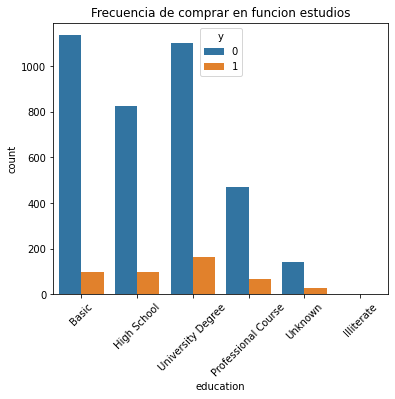

In [67]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(x="education", data=data_bank,hue="y")
plt.xticks(rotation=45)
plt.title("Frecuencia de comprar en funcion estudios")

Text(0, 0.5, &#39;proporcion de clientes&#39;)

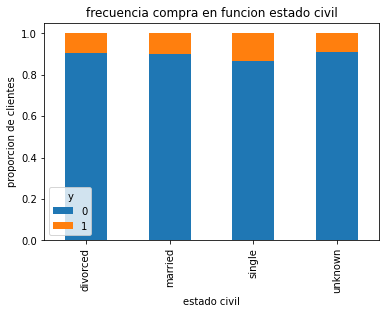

In [69]:
# hacemos lo mismo, pero de forma manual (crosstab) con estado civil
table = pd.crosstab(data_bank.marital, data_bank.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=True) # al dividirlo por el total hacemos la proporcion
plt.title("frecuencia compra en funcion estado civil")
plt.xlabel("estado civil")
plt.ylabel("proporcion de clientes")


Text(0.5, 1.0, &#39;Frecuencia de comprar en funcion dia de compra&#39;)

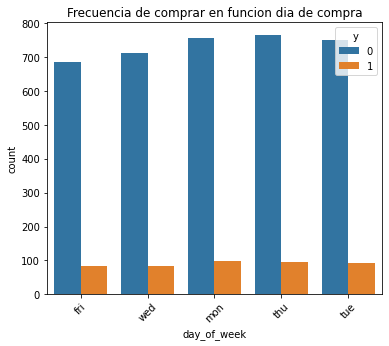

In [71]:
# vemos arriba que no influye mucho el estado civil; ahora vemos los dias de la semana
plt.figure(figsize=(6,5))
sns.countplot(x="day_of_week", data=data_bank,hue="y")
plt.xticks(rotation=45)
plt.title("Frecuencia de comprar en funcion dia de compra")

Text(0.5, 1.0, &#39;Frecuencia de comprar en funcion del mes&#39;)

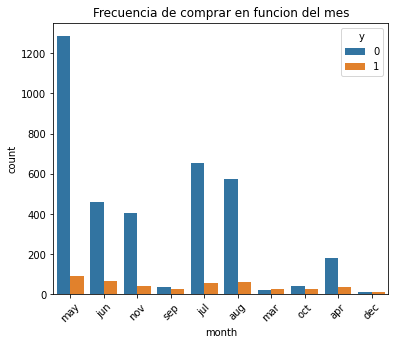

In [72]:
# tampoco hay ningun dia especial de compra; con el mes ??
plt.figure(figsize=(6,5))
sns.countplot(x="month", data=data_bank,hue="y")
plt.xticks(rotation=45)
plt.title("Frecuencia de comprar en funcion del mes")

Text(0.5, 1.0, &#39;Frecuencia de edad&#39;)

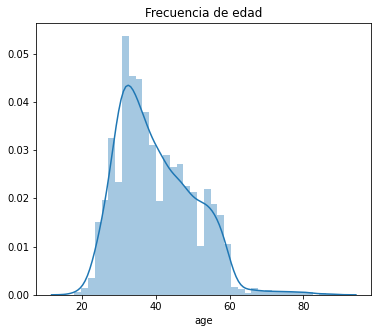

In [92]:
# vemos que en mayo se han rechazado muchos; por edad?
plt.figure(figsize=(6,5))
sns.distplot(data_bank.age)
plt.title("Frecuencia de edad")